# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="


# Build query URL
query_url = f"{url}{weather_api_key}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=01cee722765ab785ef3c09df28fd5845&q=


In [4]:
# weather_response = requests.get(query_url)
# print(weather_response)
# weather_json = weather_response.json()
# weather_json


In [27]:
len(cities)


614

In [41]:
name = []
number = []
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        print(city)
        weather_response = requests.get(query_url + city).json()
        lat.append(weather_response['coord']['lat'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        name.append(weather_response['name'])
        number.append(weather_response['id'])
    except KeyError:
        print("City not valid for some dumb reason")
  
   

mehamn
[71.0357]
bredasdorp
[71.0357, -34.5322]
ushuaia
[71.0357, -34.5322, -54.8]
ponta delgada
[71.0357, -34.5322, -54.8, 37.7333]
yellowknife
[71.0357, -34.5322, -54.8, 37.7333, 62.456]
kaitangata
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817]
lambarene
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817, -0.7001]
athabasca
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817, -0.7001, 54.7169]
albany
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817, -0.7001, 54.7169, 42.6001]
elko
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817, -0.7001, 54.7169, 42.6001, 41.0002]
kapaa
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817, -0.7001, 54.7169, 42.6001, 41.0002, 22.0752]
broome
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817, -0.7001, 54.7169, 42.6001, 41.0002, 22.0752, 42.2506]
champerico
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.2817, -0.7001, 54.7169, 42.6001, 41.0002, 22.0752, 42.2506, 14.3]
pangnirtung
[71.0357, -34.5322, -54.8, 37.7333, 62.456, -46.281

In [44]:
print(len(name))

560


In [68]:
### Convert Raw Data to DataFrame
weather_dict = {
    "City Name": name,
    "City Number": number,
    "Latitude": lat,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df

# * Export the city data into a .csv.
weather_df.to_csv('weather_output.csv')
# * Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df.head()

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Mehamn,778707,71.0357,44.17,86,100,20.33
1,Bredasdorp,1015776,-34.5322,45.72,71,98,6.91
2,Ushuaia,3833367,-54.8000,37.06,65,90,6.91
3,Ponta Delgada,3372783,37.7333,66.92,82,20,3.44
4,Yellowknife,6185377,62.4560,70.92,60,75,1.01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

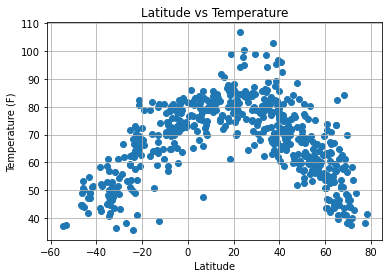

In [71]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_temp_plot")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

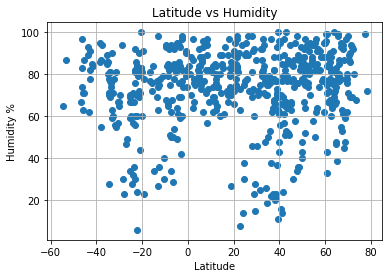

In [72]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_humidity_plot")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

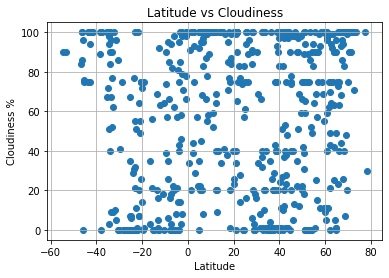

In [73]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_cloudiness_plot")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

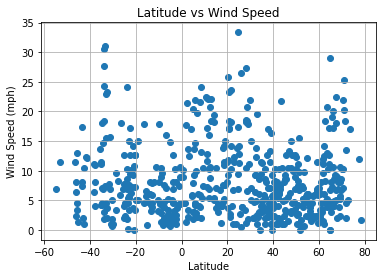

In [74]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_windspeed_plot")

# Show plot
plt.show()

## Linear Regression

In [82]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
north_df = weather_df.loc[weather_df['Latitude'] >= 0]
south_df = weather_df.loc[weather_df['Latitude'] < 0]
print(len(south_df))
print(len(north_df))

173
387


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

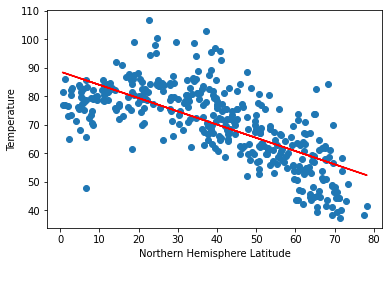

In [102]:
x_values = north_df['Latitude']
y_values = north_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

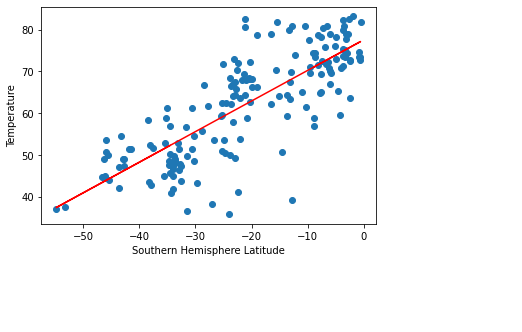

In [98]:
x_values = south_df['Latitude']
y_values = south_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

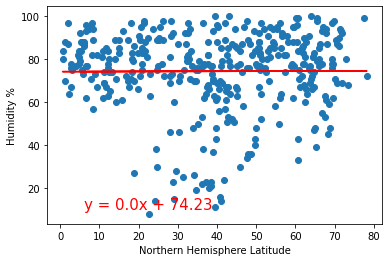

In [90]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

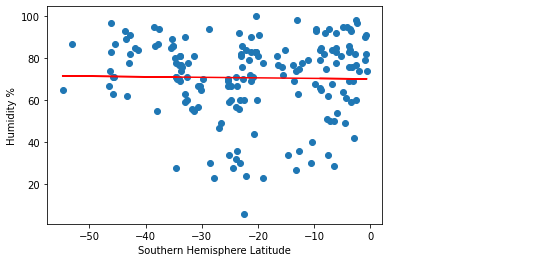

In [99]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

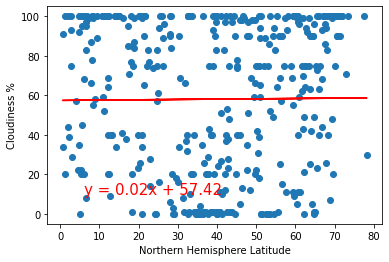

In [96]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

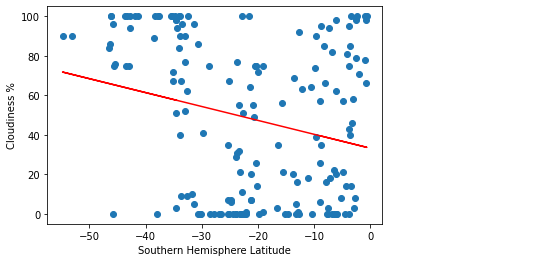

In [100]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

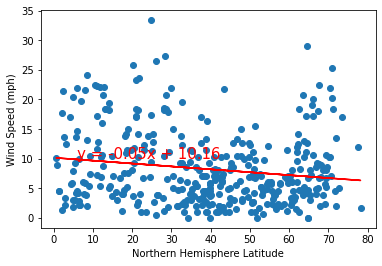

In [97]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

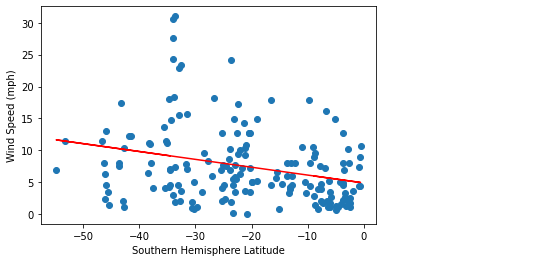

In [101]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()